<center>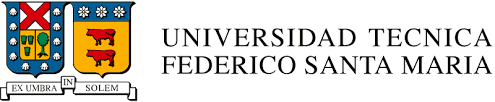</center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Clasificación de Sentimiento de Reviews de peliculas
 * Logistic regression y Naive Bayes
 * Una red neuronal feedforward
 * Una red neuronal recurrente (simple y LSTM).
 * Una red neuronal recurrente con embedding GLOVE (avanzado).
* AutoEncoders (AE)
 * AutoEncoder Convolutcional
 * Denoising AutoEncoders (DAE)
 * Detección de anomalías


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 3]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 09 de Diciembre, en horario de clases.
* Fecha de entrega: 10 de Diciembre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

# 1.- Clasificación de sentimientos

En esta tarea realizaremos clasificación de sentimientos sobre reviews de [IMDB](https://www.imdb.com/). Utilizaremos los modelos:

* Logistic regression y Naive Bayes
* Una red neuronal feedforward\
* Una red neuronal recurrente (simple y LSTM).
* Una red neuronal recurrente con embedding GLOVE.
 
Su trabajo será implementar cada uno de los modelos y estudiar las performance de cada modelo.

Primero, carguemos en memoria el conjunto de datos y veamos algunos de sus datos. ¿Qué puede decir de la base de datos?, ¿Es una tarea sencilla de realizar para una persona?, ¿Le parece que los datos de entrenamiento y de test están bien balanceados?

$\textit{R:}$ La base de datos de IMDB contiene reseñas de películas calificadas como positivas o negativas. Esta es una tarea difícil de realizar para una persona, ya que requiere una comprensión profunda del lenguaje y del contexto. Los datos de entrenamiento y de prueba parecen estar bien balanceados, ya que contienen una cantidad similar de reseñas positivas y negativas.

In [ ]:
# import pickle
classes = ['negative', 'positive']
# X_train, y_train, X_test, y_test = pickle.load(open('movies_review_train_test.dat', 'rb'))

In [5]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv")
train["sentiment"] = train["sentiment"].apply(lambda x : int(x == "pos"))

test = pd.read_csv("test.csv")
test["sentiment"] = test["sentiment"].apply(lambda x : int(x == "pos"))

In [ ]:
X_train = train[["text"]]
y_train = train[["sentiment"]]

X_test = test[["text"]]
y_test = test[["sentiment"]]

In [ ]:
print_n = 10
for k in range(print_n):
    print('Sentiment: {0}'.format(classes[y_train.iloc[k]["sentiment"]]))
    print('Text: ')
    print(X_train.iloc[k]["text"])
    print()

Sentiment: negative
Text: 
Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.

Sentiment: negative
Text: 
The saddest thing about this "tribute" is that almost all the singers (including the otherwise incredibly talented Nick Cave) seem to have missed the whole point where Cohen's intensity lies: by delivering his lines in an alm

In [ ]:
y_train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
y_test.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## 1.a - Modelos clásicos y representación de datos

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

En esta sección preprocese el texto, para esto utilice las clases CountVectorizer y TfidfVectorizer debe obtener dos representaciones vectoriales (bag of words y tf-idf) para cada uno de los ejemplos del dataset.

In [81]:
vectorizer_bgw = CountVectorizer()
vectorizer_tf = TfidfVectorizer()

# #obtener una fracción de los datos
# proportion = int(len(X_train.values.ravel())/2)
# sample_X =  X_train.sample(proportion)

# Vectorizar datos de entrenamiento con ambos metodos

# Bag of words 
vectorizer_bgw.fit(X_train.values.ravel())

# Matriz Tf-idf
vectorizer_tf.fit(X_train.values.ravel())
#

TfidfVectorizer()

In [ ]:
X_train_bgw = vectorizer_bgw.transform(X_train.values.ravel())
X_train_tf = vectorizer_tf.transform(X_train.values.ravel())

X_test_bgw = vectorizer_bgw.transform(X_test.values.ravel())
X_test_tf = vectorizer_tf.transform(X_test.values.ravel())
#####################################################

print("Atributos CountVectorizer: ", X_train_bgw.shape)
print("Atributos TfidfVectorizer: ", X_train_tf.shape)

Atributos CountVectorizer:  (25000, 74849)
Atributos TfidfVectorizer:  (25000, 74849)


CountVectorizer realiza un conteo por palabra->token utilizando el vocabulario obtenido con fit. 

El objetivo de utilizar tf-idf en lugar de las frecuencias brutas de ocurrencia de una palabra en un documento determinado es reducir el impacto de las palabras que se producen con mucha frecuencia en un corpus determinado y que, por lo tanto, empíricamente son menos informativas que las características que se producen en una pequeña fracción del corpus de formación. La formula para calcular la matriz tf-idf es:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \cdotp \text{idf}(t)$$

Donde $\text{tf}(t,d)$ es la ocurrencia de un termino $t$ en un documento $d$.

$$\text{idf}(t) = \log [ (1 + n) / (1 + df(t)) ] + 1$$

Donde $df(t)$ es el número de documentos del conjunto de documentos que contienen el término t.

Por lo tanto TfidfVectorizer es simplemente aplicar la transformación Tf-idf al CountVectorizer.

## 1.b - Logistic regression y Naive Bayes
En esta sección entrene los modelos MultinomialNB y LogisticRegression en los datos preprocesados obtenidos anteriormente, utilizando ambas representaciones cuando sea posible (es decir, para LR y NB tendrá que entrenar dos modelos por ejemplo, uno para cada representación). ¿Cuáles son las principales características y parámetros de cada modelo?, ¿Qué significa que los datos sean o no sean linealmente separables?.

La principal característica de una regresión logistica es que nos entrega un criterio de separación lineal respecto al espacio en el que se esta trabajando, es decir construye un hiperplano que separa el target en función de sus features, sus principales parametros son los pesos que van en la sigmoide utilizada en la regresión logistica. Otro parametro importante es el parametro de regularización involucrado el cual nos reduce el espacio de busqueda de los pesos.
Las principales caracteristicas de MultinomialNB es su parametro de suavizamiento, el cual suma un 1 en la frecuencia de todos las posibles palabras que se encuentren en el corpus estudiado, para así evitar tener problemas con clases no representadas, la otra caracteristica importante es poder trabajar con una probabilidad a priori para utilizar en la clasificación, el cual se va ajustando desde el valor a entregar.


Si el problema es linealmente separable significa que existe un hiperplano separador en el espacio vectorial de las features de tal manera que los target en los datos son totalmente separados en dos conjuntos, si el conjunto no es linealmente superable significa que no existe un hiperplano que sea capaz de separar el target en grupos totalmente separados.



In [ ]:
X_train_bgw

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tf

<25000x74849 sparse matrix of type '<class 'numpy.float64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

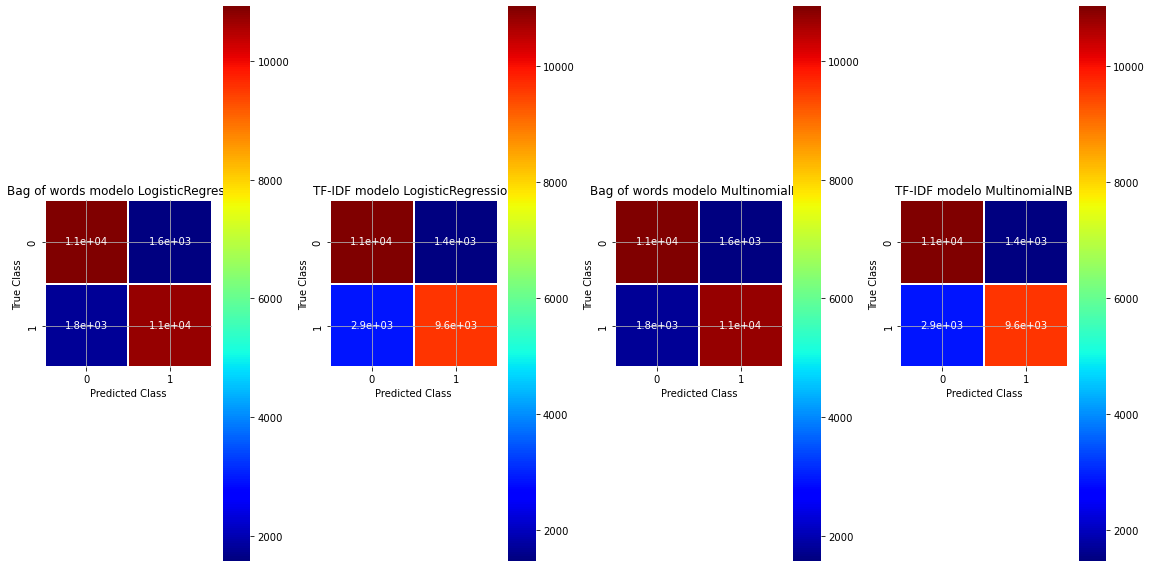


################# Modelo LogisticRegression Bag of words #################

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

###################################################

################# Modelo LogisticRegression TF-IDF #################

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     12500
           1       0.87      0.77      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

###################################################

################# Modelo MultinomialNB Bag of words #################

              precisio

In [ ]:
def modelo(clf, X_train, y_train, X_test, y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred, classification_report(y_test, y_pred)
   

plt.rcParams["figure.figsize"]=[16,8]

clf = [LogisticRegression(max_iter=10000), MultinomialNB(), None, None]
datos = ['Bag of words', 'TF-IDF']
models = ['LogisticRegression', 'MultinomialNB']
tr_sets = [X_train_bgw, X_train_tf]
test_sets = [X_test_bgw, X_test_tf]
reportes = list()

k=1
for cl in range(len(clf)):
                      
    y_pred, reporte = modelo(clf[int(cl%2)], tr_sets[int(cl%2)], y_train.values.ravel(), test_sets[int(cl%2)], y_test.values.ravel()) 
    
    reportes.append(reporte)       
    
    ax = plt.subplot(1,4,k)

    sns.heatmap(np.around(confusion_matrix(y_test, y_pred), decimals=2), robust=True, linewidths=0.1, square=True,annot=True,cmap='jet',linecolor="white", ax=ax, cbar=True);
    ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class');False
    ax.set_title(f'{datos[int(cl%2)]} modelo {models[int(cl/2)]}');

    plt.tight_layout()
    plt.grid()
    if k==4:
        k=1
        plt.show()
    else:
        k+=1

for r in range(len(reportes)):
    print(f"\n################# Modelo {models[int(r/2)]} {datos[int(r%2)]} #################\n")
    print(reportes[r])
    print(f"###################################################")

¿Qué representación es mejor en cada modelo?

La mejor representación es la de bag of word, pues tiene un mejor desempeño en el estadistico f1-score para ambos modelos.

## 1.c - Modelos de redes neuronales

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, SimpleRNN, Add, Lambda, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History, EarlyStopping

In [ ]:
# Definición de parámetros
batch_size = 32
epochs = 2
num_classes = 1 # Positivo o negativo, pero para la capa de salida es 1 neurona sigmoide
max_words = 70
embedding_size = 30

### Preprocesamiento
A continuación preprocesaremos los datos, realizando tokenización.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)
word_index = tokenizer.word_index
num_words = len(tokenizer.word_index) + 1

In [ ]:
# Transformando texto a secuencias de indices
X_tr = tokenizer.texts_to_sequences(X_train.values.ravel())
X_te = tokenizer.texts_to_sequences(X_test.values.ravel())

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Se agregan 0 a textos que tienen menos de max_words palabras y se cortan los que tienen mas
X_tr_pad = pad_sequences(X_tr, maxlen=max_words)
X_te_pad = pad_sequences(X_te, maxlen=max_words)

# Se convierten label a version categorica
y_trainc = y_train.values
y_testc = y_test.values

## 1.d -  Red Neuronal FeedFordward

Primero entrenaremos una red neuronal feedforward directamente en el texto tokenizado, utilizando un embedding simple.

In [ ]:
my_callbacks = [History(), EarlyStopping(patience=5, restore_best_weights = True)]

document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)
# Sumando los embedding
embedding = Lambda(lambda x: K.sum(x, axis=1), 
                   output_shape=(embedding_size,))(embedding)
# Aplicando una capa densa en la suma
dense = Dense(20, activation='relu')(embedding)

output = Dense(num_classes, activation='sigmoid')(dense)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=40,
                  verbose=1,
                  validation_split=0.2, 
                  callbacks=my_callbacks)

Epoch 1/40
625/625 [==============================] - 4s 5ms/step - loss: 0.6999 - accuracy: 0.4986 - val_loss: 0.7041 - val_accuracy: 0.4958
Epoch 2/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6957 - accuracy: 0.4979 - val_loss: 0.6934 - val_accuracy: 0.5042
Epoch 3/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6967 - accuracy: 0.4929 - val_loss: 0.6932 - val_accuracy: 0.5042
Epoch 4/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6947 - accuracy: 0.4936 - val_loss: 0.6934 - val_accuracy: 0.5042
Epoch 5/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6951 - accuracy: 0.5071 - val_loss: 0.6937 - val_accuracy: 0.5042
Epoch 6/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6944 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.4956
Epoch 7/40
625/625 [==============================] - 3s 5ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy en datos de test: 0.4999600052833557


### Red Neuronal Recurrente Simple con Embedding

Explique cómo funcionan las redes recurrentes e investigue qué es y cómo usar el embedding y la librería `SimpleRNN`.

Las redes recurrentes son un tipo de red neuronal que usa datos secuenciales para predecir resultados. Están diseñadas para procesar información a través de la memoria de un proceso markoviano, aprendiendo patrones en los datos y luego utilizando estas habilidades adquiridas para hacer predicciones sobre nuevas entradas.

El embedding es un proceso por el cual se codifican palabras o frases como vectores numéricos con un peso representativo.
SimpleRNN es una librería de Python que se usa para crear modelos de redes neuronales recurrentes simples. Está diseñada para simplificar la construcción, entrenamiento y evaluación de los modelos RNN ya sea con datos secuenciales o no. La librería también permite a los usuarios implementar capas adicionales en sus modelos como el embedding.

Reemplace la suma de embedding y la capa densa por una red SimpleRNN con 10 unidades, utilice return_sequence=False.

In [ ]:
my_callbacks = [History(), EarlyStopping(patience=5, restore_best_weights = True)]
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)

rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False)(embedding)

# Aplicando una capa densa luego de la RNN
output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=40,
                  verbose=1,
                  validation_split=0.2, 
                  callbacks=my_callbacks)

Epoch 1/40
625/625 [==============================] - 45s 70ms/step - loss: 0.6936 - accuracy: 0.4988 - val_loss: 0.6935 - val_accuracy: 0.4956
Epoch 2/40
625/625 [==============================] - 43s 69ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5042
Epoch 3/40
625/625 [==============================] - 44s 70ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 4/40
625/625 [==============================] - 45s 72ms/step - loss: 0.6933 - accuracy: 0.4961 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 5/40
625/625 [==============================] - 44s 70ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 6/40
625/625 [==============================] - 43s 70ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 7/40
625/625 [==============================] - 45s 72ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy:

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 10s 13ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy en datos de test: 0.5


### Dropout

Aplique un dropout de 0.4 luego de la capa RNN para evitar el sobre ajuste. Averigue sobre Dropout y explique como funciona en este tipo de redes.

In [ ]:
my_callbacks = [History(), EarlyStopping(patience=5, restore_best_weights = True)]
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)

rnn = SimpleRNN(units=10, activation='tanh', return_sequences=False, dropout=0.4)(embedding)

droput = Dropout(0.4)(rnn)

# Aplicando una capa densa luego de la RNN
output = Dense(num_classes, activation='sigmoid')(droput)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=40,
                  verbose=1,
                  validation_split=0.2, 
                  callbacks=my_callbacks)

Epoch 1/40
625/625 [==============================] - 48s 75ms/step - loss: 0.6949 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 2/40
625/625 [==============================] - 45s 72ms/step - loss: 0.6936 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.4958
Epoch 3/40
625/625 [==============================] - 50s 81ms/step - loss: 0.6938 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 4/40
625/625 [==============================] - 47s 75ms/step - loss: 0.6936 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 5/40
625/625 [==============================] - 48s 76ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 6/40
625/625 [==============================] - 45s 73ms/step - loss: 0.6936 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.4956
Epoch 7/40
625/625 [==============================] - 47s 75ms/step - loss: 0.6935 - accuracy: 0.4925 - val_loss: 0.6933 - val_accuracy:

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 9s 12ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy en datos de test: 0.5


## 1.e - Red LSTM con Embedding

Explique qué es y para qué tareas se utilizan las LSTM, explique para qué es cada compuerta de una neurona de este tipo.

Las redes neuronales LSTM (Long Short Term Memory) son un tipo de red neuronal recurrente que se utiliza para predecir patrones a largo plazo en los datos. Estas redes pueden recordar información durante periodos más largos y tomar decisiones basadas en la memoria de esa información, lo que les da una ventaja comperativa para problemas como el procesamiento del lenguaje natural.

Una neurona LSTM tiene tres compuertas: entrada, olvido y salida. 
La compuerta de entrada controla qué parte de la información entrante se almacena en la memoria. 
La compuerta de olvido controla qué información se elimina de la memoria. 
Finalmente, la compuerta de salida determina qué parte de los datos almacenados en la memoria es relevante para el problema y cuál es su impacto sobre el resultado final. Estas compuertas se controlan con la ayuda de los pesos y la filosfía que va detras es que permite hacer un dropout y apagar las salidas que no serán utiles para la predicción.

In [ ]:
my_callbacks = [History(), EarlyStopping(patience=5, restore_best_weights = True)]
document_input = Input(shape=(max_words, ), dtype='int32')
# Embedding Layer
embedding = Embedding(input_dim=num_words, output_dim=embedding_size, 
                      input_length=max_words, 
                      trainable=True)(document_input)

rnn = LSTM(units=10,
           activation='tanh',
           recurrent_activation="sigmoid",
           return_sequences=False,
           dropout=0.8,
           recurrent_dropout=0,
           unroll=False)(embedding)

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_trainc,
                  batch_size=batch_size,
                  epochs=40,
                  verbose=1,
                  validation_split=0.2, 
                  callbacks=my_callbacks)

Epoch 1/40
625/625 [==============================] - 11s 11ms/step - loss: 0.6933 - accuracy: 0.4979 - val_loss: 0.6933 - val_accuracy: 0.4958
Epoch 2/40
625/625 [==============================] - 7s 10ms/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 3/40
625/625 [==============================] - 6s 10ms/step - loss: 0.6933 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 4/40
625/625 [==============================] - 7s 11ms/step - loss: 0.6933 - accuracy: 0.4946 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 5/40
625/625 [==============================] - 6s 10ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.4962
Epoch 6/40
625/625 [==============================] - 7s 10ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 7/40
625/625 [==============================] - 6s 10ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.496

In [ ]:
loss, acc = model.evaluate(X_te_pad, y_testc)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 4s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy en datos de test: 0.5


Grafique las curvas de error para los datos de entrenamiento, validación y test para el último modelo, concluya sobre estas.

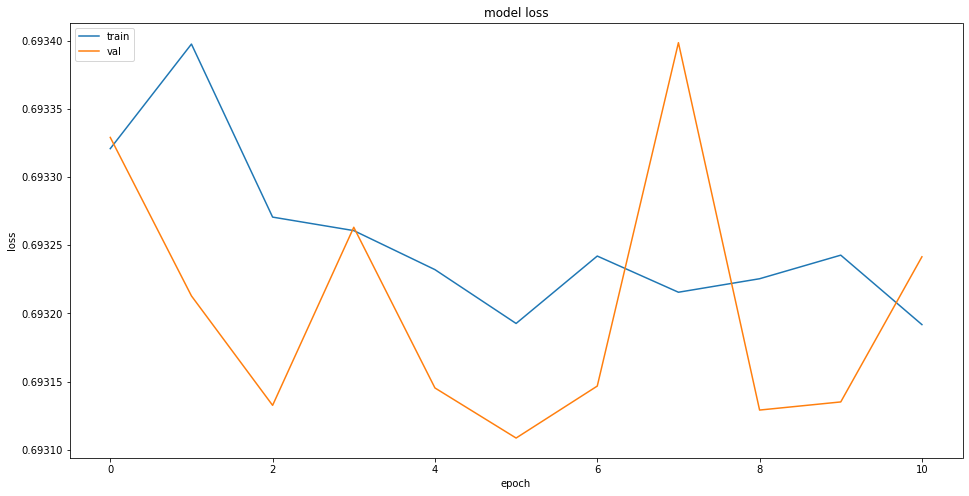

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Mientras el error de entrenamiento esta bajando, el error en el validation set esta oscilando, por lo que pareciera ser que el modelo esta realizando overfitting, de hecho se detiene pues tenemos un callback para evitar que caiga en el overfitting.

## 1.f -  Red LSTM con GLOVE embedding

Descargue los embeddings pre entrenados desde https://nlp.stanford.edu/projects/glove/
archivo glove.6B.zip y extraiga los datos para utilizarlos en esta sección. Describa brevemente en qué consiste el embedding GLOVE, en qué casos es conveniente y cómo usarlo.

El embedding GLOVE (Global Vectors for Word Representation) es un modelo de procesamiento de lenguaje natural. Está compuesto por una matriz de palabras y vectores, donde cada palabra se representa como un vector de tamaño fijo. Esta representación permite a los algoritmos de aprendizaje automático trabajar con datos textuales sin necesidad de procesar el lenguaje natural.

GLOVE es útil para representar palabras en diversos contextos y puede ser una herramienta útil para problemas de clasificación de texto, como el análisis de sentimentos, el análisis de temas y la extracción de entidades.

In [ ]:
# Funciones para cargar los vectores GLOVE
def glorot_uniform_np(shape):
    fan_in, fan_out = shape[0],shape[1]
    s = np.sqrt(6. / (fan_in + fan_out))
    return np.random.uniform(-s, s, size=shape)

def load_word_vectors(embeddings_index, glove_file):
    print('Indexing word vectors.')
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    glove_file.close()
    print('Found %s word vectors.' % len(embeddings_index))    



In [ ]:
# Cargando los vectores GLOVE
## LOAD PRETRAINED WORD VECTORS
GLOVE_FILE = 'glove.6B.100d.txt'
embeddings_index = {}
glove_file = open(GLOVE_FILE, encoding="utf8")
                  
load_word_vectors(embeddings_index, glove_file)   
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embeddings_index = {}

Indexing word vectors.
Found 400000 word vectors.


Modifique la capa Embedding para utilizar los embedding pre-entrenados, para esto utilice el argumento embeddings_initializer con el valor Constant(embedding_matrix). Entrene con GLOVE embedding y el mejor modelo que haya obtenido hasta el momento o si desea puede probar modificandolo, por ejemplo agregando capas de LSTM, Dropout, Densa, ..., sientase libre de experimentar y mejorar sus resultados.

In [43]:
from keras.initializers import Constant

document_input = Input(shape=(max_words, ), dtype='int32')

embedding = Embedding(input_dim=num_words,
                      embeddings_initializer=Constant(embedding_matrix),
                      output_dim=100, 
                      input_length=max_words,
                      trainable=False)(document_input)

rnn = LSTM(units=10,
           activation='tanh',
           recurrent_activation="sigmoid",
           return_sequences=False,
           dropout=0.8,
           recurrent_dropout=0,
           unroll=False)(embedding)

output = Dense(num_classes, activation='sigmoid')(rnn)

# Construyendo el modelo
model = Model(inputs=[document_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_tr_pad, y_train,
                  batch_size=batch_size,
                  epochs=40,
                  verbose=1,
                  validation_split=0.2, 
                  callbacks=my_callbacks)

Epoch 1/40
625/625 [==============================] - 8s 11ms/step - loss: 0.6933 - accuracy: 0.4979 - val_loss: 0.6933 - val_accuracy: 0.4962
Epoch 2/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6933 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 3/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 4/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 5/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 6/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 7/40
625/625 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch

In [44]:
loss, acc = model.evaluate(X_te_pad, y_test)
print('Accuracy en datos de test: {0}'.format(acc))

782/782 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Accuracy en datos de test: 0.5


Las tarea fue compleja para nuestras arquitecturas, no se aprecia una mejora al utilizar Glove, de hecho todos nuestros desempeños fueron con accuracy en el test set cercanos a 0.5, con lo que no se consigue un buen desempeño en la tarea.

# 2.-  AutoEncoders

Un autoencoder es un tipo especial de red neuronal que está entrenada para copiar su input a su output (es decir, su target es el input). 
<center>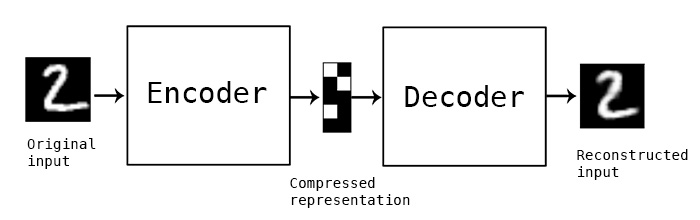

    
Por ejemplo, dada una imagen de un dígito escrito a mano, un autoencoder primero codifica la imagen en una representación latente de menor dimensión y luego decodifica la representación latente de nuevo en una imagen. Un autoencoder aprende a comprimir los datos mientras minimiza el error de reconstrucción.

A continuación se explorarán diferentes arquitecturas y usos de los autoencoder

##### a - Autoencoder básico
##### b - Denoising Autoencoder
##### c - Detección de anomalías con autoencoders

### Importar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.layers import Dense
from keras.models import Sequential

c:\Users\TAZ\miniconda3\envs\redes\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\TAZ\miniconda3\envs\redes\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\TAZ\miniconda3\envs\redes\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\TAZ\miniconda3\envs\redes\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Carga de datos y breve exploración

Para los ejemplos 2.a y 2.b se utilizará el dataset Fashion MNIST, el cuál puede ser obtenido desde `keras.datasets` como se muestra a continuación.

Luego, visualice algunas imágenes de cada una de las categorías junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imágenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. 


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle_boot']

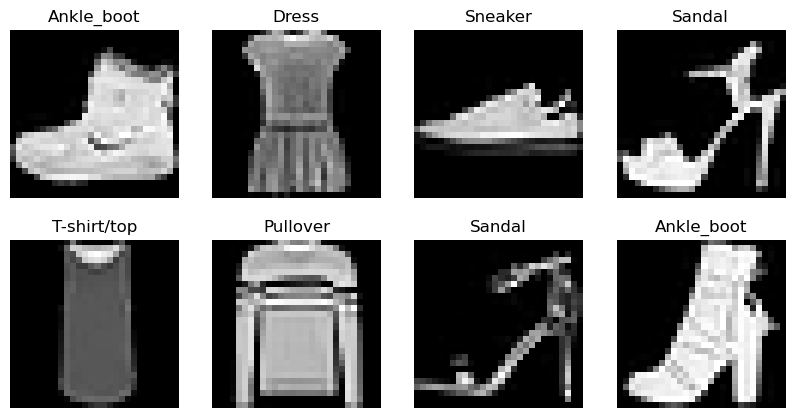

In [5]:
# vizualize 8 images from the dataset in a 2x4 grid

 
fig, ax = plt.subplots(2,4, figsize=(10,5))
for i in range(2):
    for j in range(4):
        ax[i,j].imshow(x_train[i*2+j*3 , ...], cmap='gray')
        ax[i,j].set_title(labels[y_train[i*2+j*3]])
        ax[i,j].axis('off') 

plt.show()  


* ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? 

Los pares de categorías que podrían ocasionar problemas de clasificación son aquellos que tienen características visuales similares, como botas y zapatos, o suéteres y camisetas. 

* ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

Un humano podría desempeñarse bien en esta tarea, siempre y cuando esté familiarizado con las categorías y sepa qué buscar en cada imagen.

## 2.a - Autoencoder básico

#### Autoencoder denso

Defina un autoencoder con dos capas densas: un `codificador` (encoder) , que comprime las imágenes en un vector latente de "d" dimensiones, y un `decodificador` (decoder), que reconstruye la imagen original a partir del espacio latente.

¿A cuál función de activación debería corresponder a la capa de salida de la red? (decoder)

Debe ser una función de activación sigmoidal o bien podría ser lineal, puesto que la tarea que se esta realizando es la reconstrucción de una imagen en blanco y negro con escalas de grises, es decir trabajamos en el intervalo [0,1].

Para definir su modelo, use la [API de subclases de modelos de Keras](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


Pruebe tres autoencoders con d = 64, d = 324 y otro con d = dimensión original (notar que las imágenes son de 28*28)


In [30]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim   
        
        self.encoder = tf.keras.Sequential([layers.Flatten(), layers.Dense(latent_dim, activation='relu')])
        
        self.decoder = tf.keras.Sequential([layers.Dense(784, activation="sigmoid"), layers.Reshape((28, 28))])

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

In [31]:
latent_dim = 64

autoencoder_64 = Autoencoder(latent_dim) 

autoencoder_64.compile(
    optimizer = Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanSquaredError()]
)

Entrene el modelo con x_train como input y como target. El encoder aprenderá a comprimir el conjunto de datos de "d" dimensiones al espacio latente, y el decoder aprenderá a reconstruir las imágenes originales.

In [32]:
autoencoder_64.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 2/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 3/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 4/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoc

In [33]:
latent_dim = 324

autoencoder_324 = Autoencoder(latent_dim) 

autoencoder_324.compile(
    optimizer = Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanSquaredError()]
)

autoencoder_324.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7/10
1875/

In [34]:
latent_dim = 784

autoencoder_784 = Autoencoder(latent_dim) 

autoencoder_784.compile(
    optimizer = Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanSquaredError()]
)

autoencoder_784.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 7/10
1875/

Ahora que ya están entrenados los modelos, pruebe codificando y decodificando las imágenes de test y luego grafique al menos 10  imágenes originales y sus correspondientes imágenes reconstruidas para cada "d", compare y comente. 

In [35]:
encoded_imgs = autoencoder_64.encoder(x_test[ : 10]).numpy().tolist() + autoencoder_324.encoder(x_test[ : 10]).numpy().tolist() + autoencoder_784.encoder(x_test[ : 10]).numpy().tolist()

In [36]:
decoded_imgs = x_test[ : 10].tolist() + autoencoder_64.decoder(tf.convert_to_tensor(encoded_imgs[:10])).numpy().tolist() + autoencoder_324.decoder(tf.convert_to_tensor(encoded_imgs[10 : 20])).numpy().tolist() + autoencoder_784.decoder(tf.convert_to_tensor(encoded_imgs[20 : ])).numpy().tolist()

In [16]:
def array_to_image(array):
    return tf.keras.preprocessing.image.array_to_img(tf.transpose(tf.concat([[array], [array], [array]], axis = 0)))

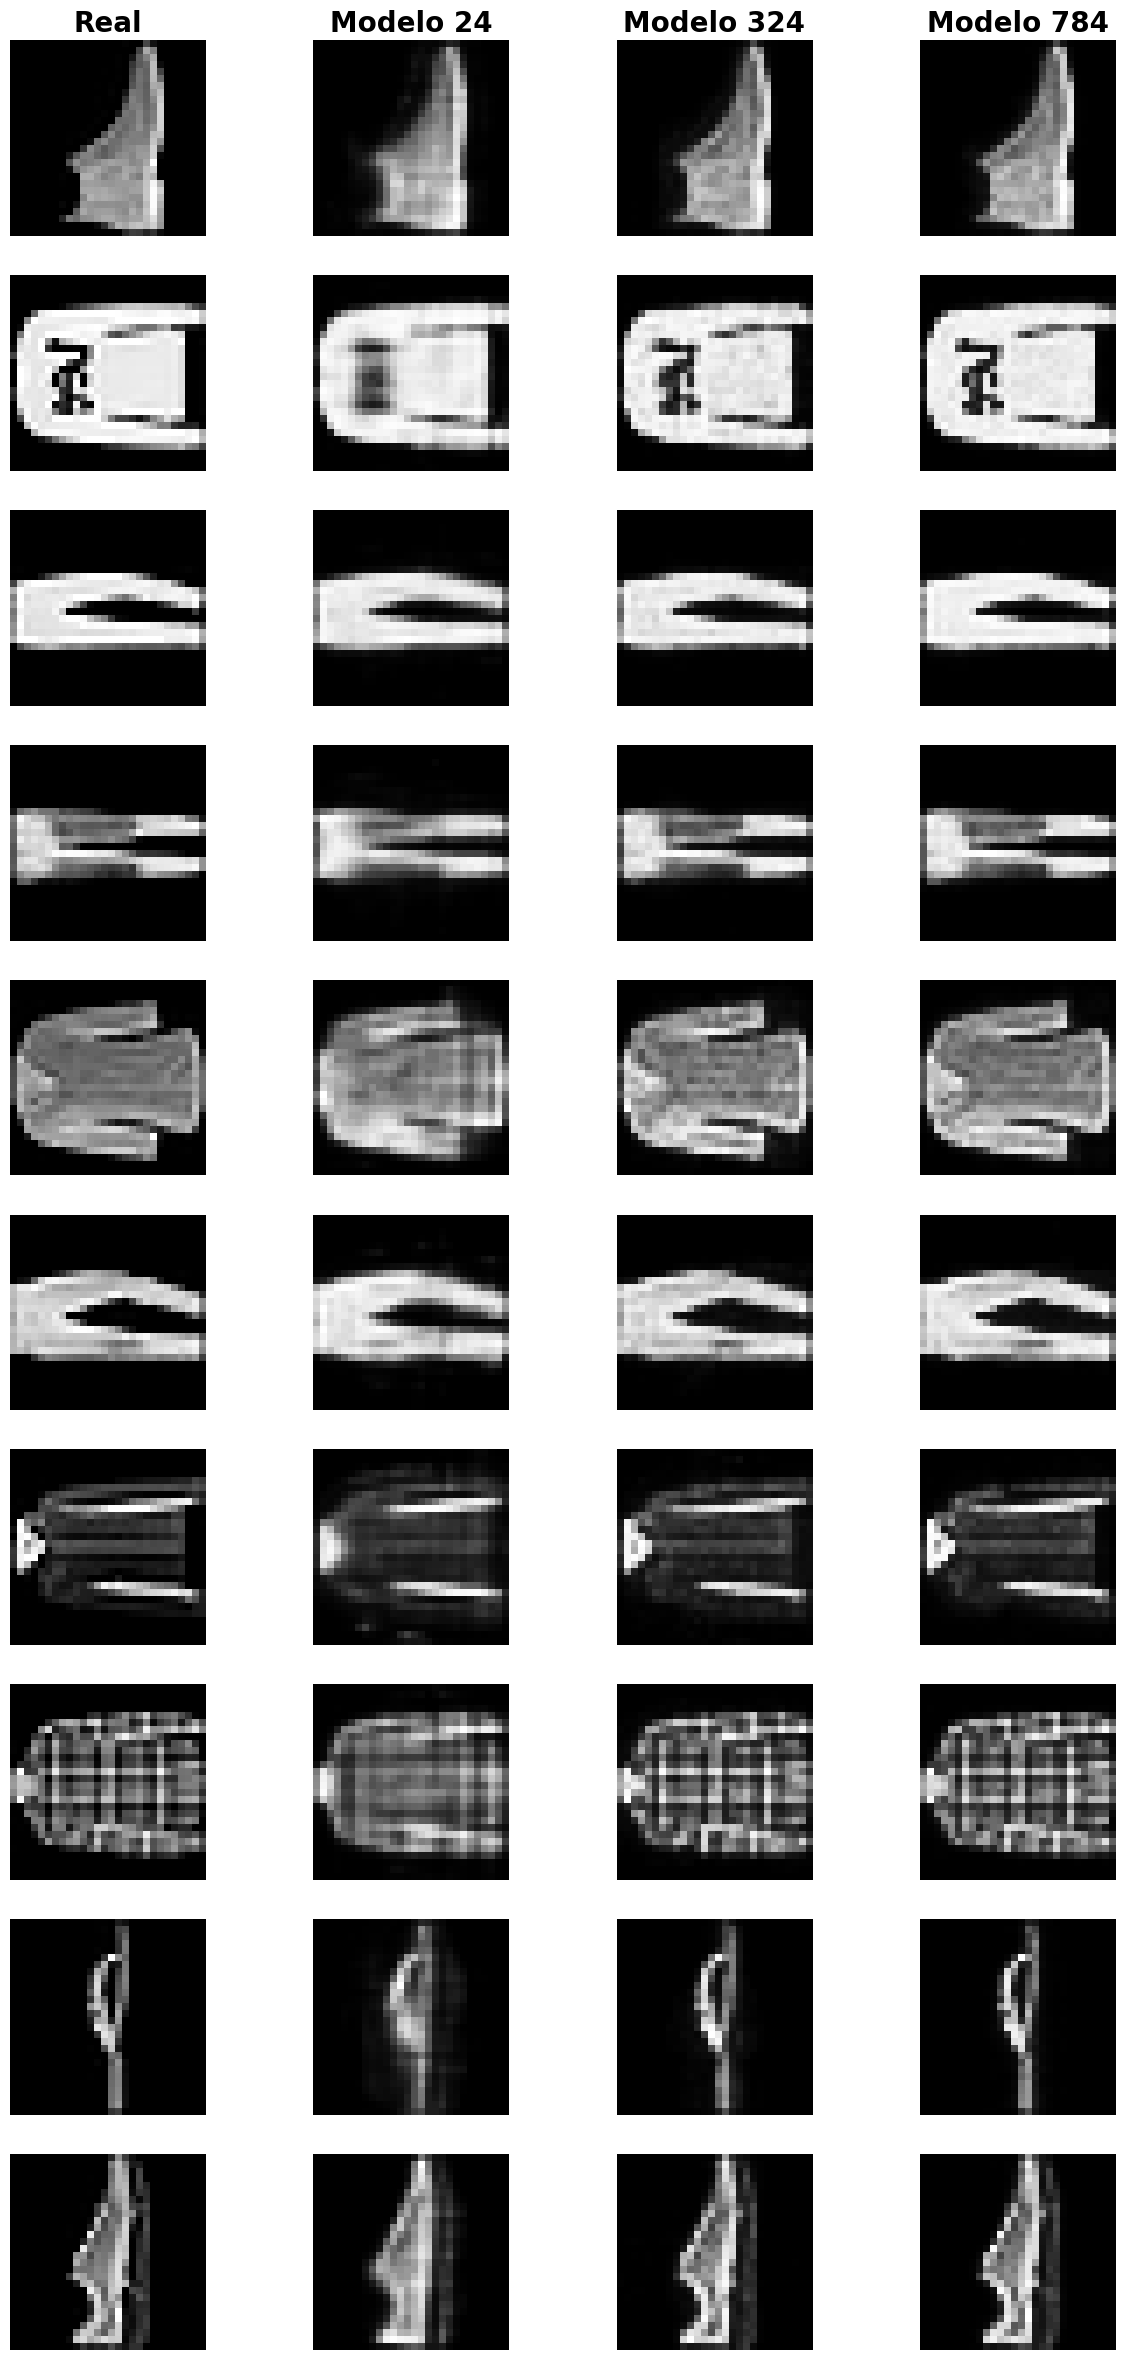

In [38]:
fig = plt.figure(figsize=(15, 30))

for i in range(4):
    for j in range(10):
        
        fig.add_subplot(10, 4, i + j * 4 + 1)
        plt.imshow(array_to_image(decoded_imgs[10 * i + j]))
        plt.axis("off")
        
        if j == 0:
            plt.title(["Real", "Modelo 24", "Modelo 324", "Modelo 784"][i], fontsize=20, weight='bold')

#### Deep Autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente d=64. 

Utilice  igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding a d=324 y compare.

In [ ]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim, factor = 2):
        
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim   
        
        self.encoder = tf.keras.Sequential()
        self.encoder.add(layers.Flatten())
        
        cant = 28*28 / factor
        cont = 1
        
        print("Flatten at decoder")
        while cant > latent_dim:
            print(f"Dense {cont} with {int(cant)} at encoder")
            self.encoder.add(layers.Dense(int(cant), activation = "sigmoid"))
            cant = cant / factor
            cont += 1
        
        print(f"Dense {cont} with {latent_dim} at encoder")
        self.encoder.add(layers.Dense(latent_dim, activation='relu'))
        
        self.decoder = tf.keras.Sequential()
        
        cant = cant * factor
        cont = 1
        print()
        
        while cant < 28*28:
            print(f"Dense {cont} with {int(cant)} at decoder")
            self.decoder.add(layers.Dense(int(cant)))
            cant = cant * factor
            cont += 1
        print(f"Dense {cont} with {28*28} at decoder")
        self.decoder.add(layers.Dense(28*28))
        print("Reshape at decoder")
        self.decoder.add(layers.Reshape((28, 28)))

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

In [ ]:
latent_dim = 64

deep_autoencoder_64 = Autoencoder(latent_dim) 

deep_autoencoder_64.compile(
    optimizer = Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanSquaredError()]
)

Flatten at decoder
Dense 1 with 392 at encoder
Dense 2 with 196 at encoder
Dense 3 with 98 at encoder
Dense 4 with 64 at encoder

Dense 1 with 98 at decoder
Dense 2 with 196 at decoder
Dense 3 with 392 at decoder
Dense 4 with 784 at decoder
Reshape at decoder


In [ ]:
deep_autoencoder_64.fit(x_train, x_train,
                     epochs=50,
                     shuffle=True,
                     validation_data=(x_test, x_test),
                     callbacks = my_callbacks)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 7/50
1875/

In [ ]:
deep_autoencoder_64.summary()

Model: "autoencoder_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_41 (Sequential)  (None, 64)                410390    
                                                                 
 sequential_42 (Sequential)  (None, 28, 28)            411110    
                                                                 
Total params: 821,500
Trainable params: 821,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
latent_dim = 324

deep_autoencoder_324 = Autoencoder(latent_dim, 1.25) 

deep_autoencoder_324.compile(
    optimizer = Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanSquaredError()]
)

Flatten at decoder
Dense 1 with 627 at encoder
Dense 2 with 501 at encoder
Dense 3 with 401 at encoder
Dense 4 with 324 at encoder

Dense 1 with 401 at decoder
Dense 2 with 501 at decoder
Dense 3 with 627 at decoder
Dense 4 with 784 at decoder
Reshape at decoder


In [ ]:
deep_autoencoder_324.fit(x_train, x_train,
                     epochs=50,
                     shuffle=True,
                     validation_data=(x_test, x_test),
                     callbacks = my_callbacks)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 7/50
1875/

In [ ]:
deep_autoencoder_324.summary()

Model: "autoencoder_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_43 (Sequential)  (None, 324)               1138373   
                                                                 
 sequential_44 (Sequential)  (None, 28, 28)            1138833   
                                                                 
Total params: 2,277,206
Trainable params: 2,277,206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = deep_autoencoder_64.encoder(x_test[ : 10]).numpy().tolist() + deep_autoencoder_324.encoder(x_test[ : 10]).numpy().tolist()
decoded_imgs = x_test[ : 10].tolist() + deep_autoencoder_64.decoder(tf.convert_to_tensor(encoded_imgs[:10])).numpy().tolist() + deep_autoencoder_324.decoder(tf.convert_to_tensor(encoded_imgs[10 : 20])).numpy().tolist()

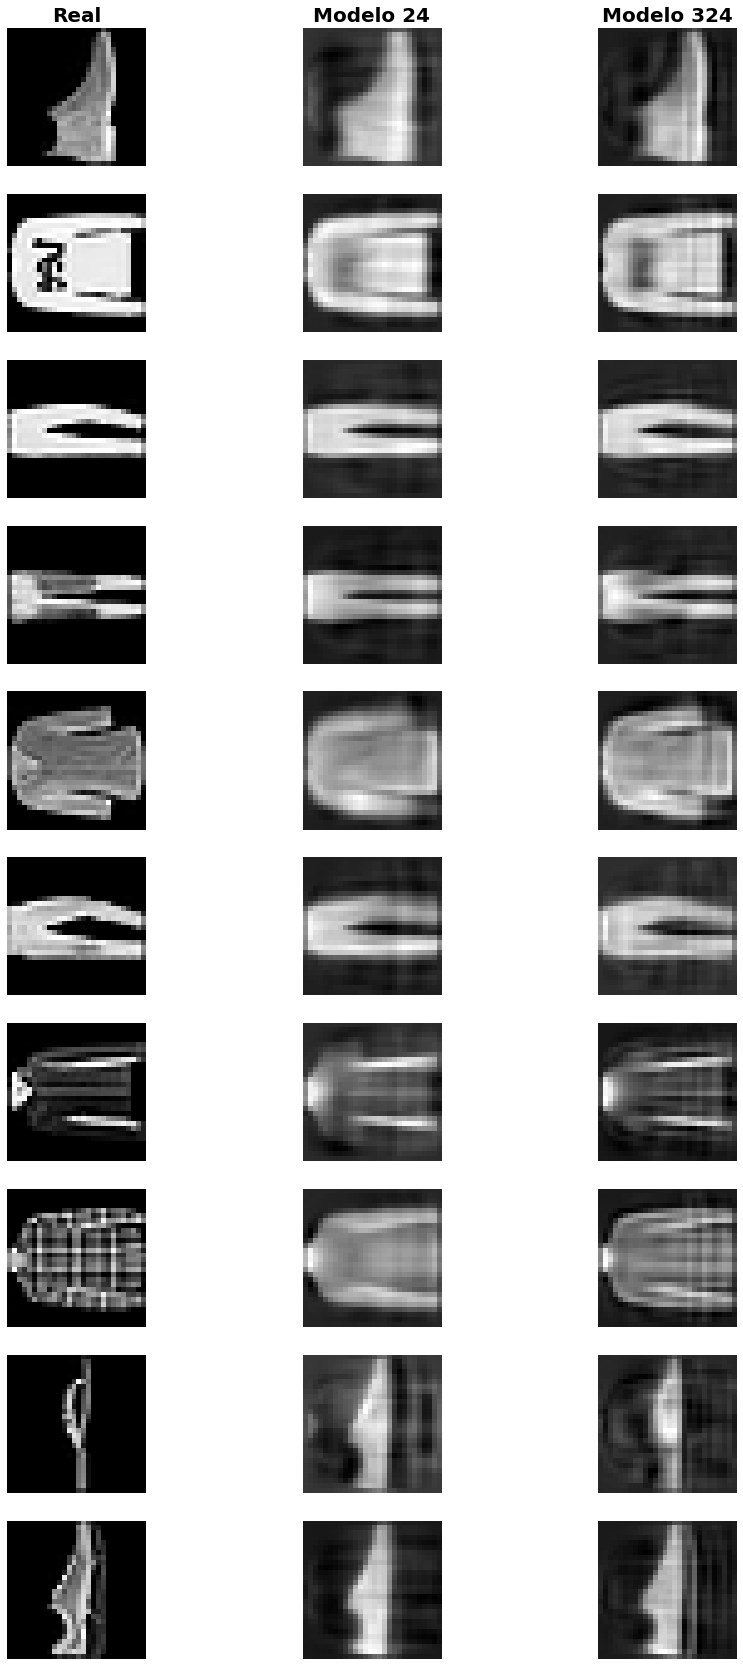

In [ ]:
fig = plt.figure(figsize=(15, 30))

for i in range(3):
    for j in range(10):
        
        fig.add_subplot(10, 3, i + j * 3 + 1)
        plt.imshow(array_to_image(decoded_imgs[10 * i + j]))
        plt.axis("off")
        
        if j == 0:
            plt.title(["Real", "Modelo 24", "Modelo 324"][i], fontsize=20, weight='bold')

#### Autoencoder Convolucional

Defina ahora, un autoencoder convolucional. La sección de encoding de la red se creará de igual manera queconvolucional cualquier red convolucional. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Ponga atención a como varía la dimensión de la imagen a lo largo del proceso, recuerde que se quiere comprimir y descomprimir la imagen. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada `Deconvolution` o [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) . 
Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 


¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imágenes reconstruidas. Luego compare su resultado con la red densa.

Observe cómo se reducen las muestras de las imágenes utilizando  `.summary()` en el encoder y cómo se amplian en el decoder

In [10]:
def convolutional_autoencoder():
    input = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    # Autoencoder
    autoencoder = Model(input, x)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    return autoencoder

auto_conv = convolutional_autoencoder()
auto_conv.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       3692

Epoch 1/10
1875/1875 [==============================] - 25s 8ms/step - loss: 0.2668 - val_loss: 0.2552
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2515 - val_loss: 0.2523
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2494 - val_loss: 0.2509
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2484 - val_loss: 0.2500
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2477 - val_loss: 0.2495
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2472 - val_loss: 0.2491
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2469 - val_loss: 0.2488
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2466 - val_loss: 0.2485
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2463 - val_loss: 0.2483
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

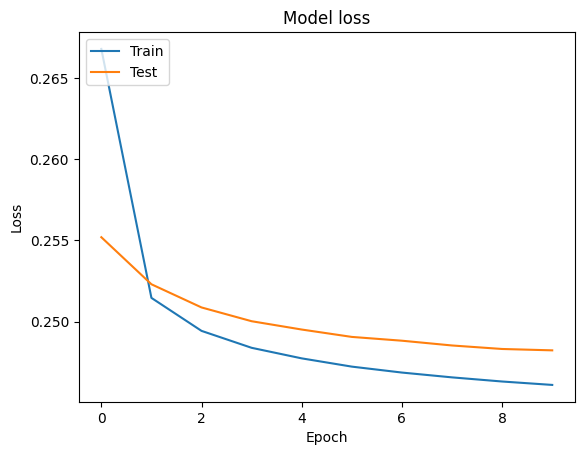

In [11]:
my_callbacks = [History(), EarlyStopping(monitor='val_loss', patience=5)]

history = auto_conv.fit(x_train, x_train,
                        epochs=10,
                        shuffle=True,
                        validation_data=(x_test, x_test),
                        callbacks = my_callbacks)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
def plot_before_after(before, after, n_before='Before', n_after = 'After'):
    n = min(len(before), len(after))

    fig = plt.figure(figsize=(10, n * 3))
    for i in range(n):
        fig.add_subplot(10, 2, i * 2 + 1)
        plt.imshow(array_to_image(before[i]))
        plt.axis("off")
        if i== 0:
            plt.title(n_before, fontsize=20, weight='bold')
        fig.add_subplot(10, 2, i * 2 + 2)
        plt.imshow(array_to_image(after[i]))
        plt.axis("off")
        if i== 0:
            plt.title(n_after, fontsize=20, weight='bold')

1/1 [==============================] - 0s 15ms/step


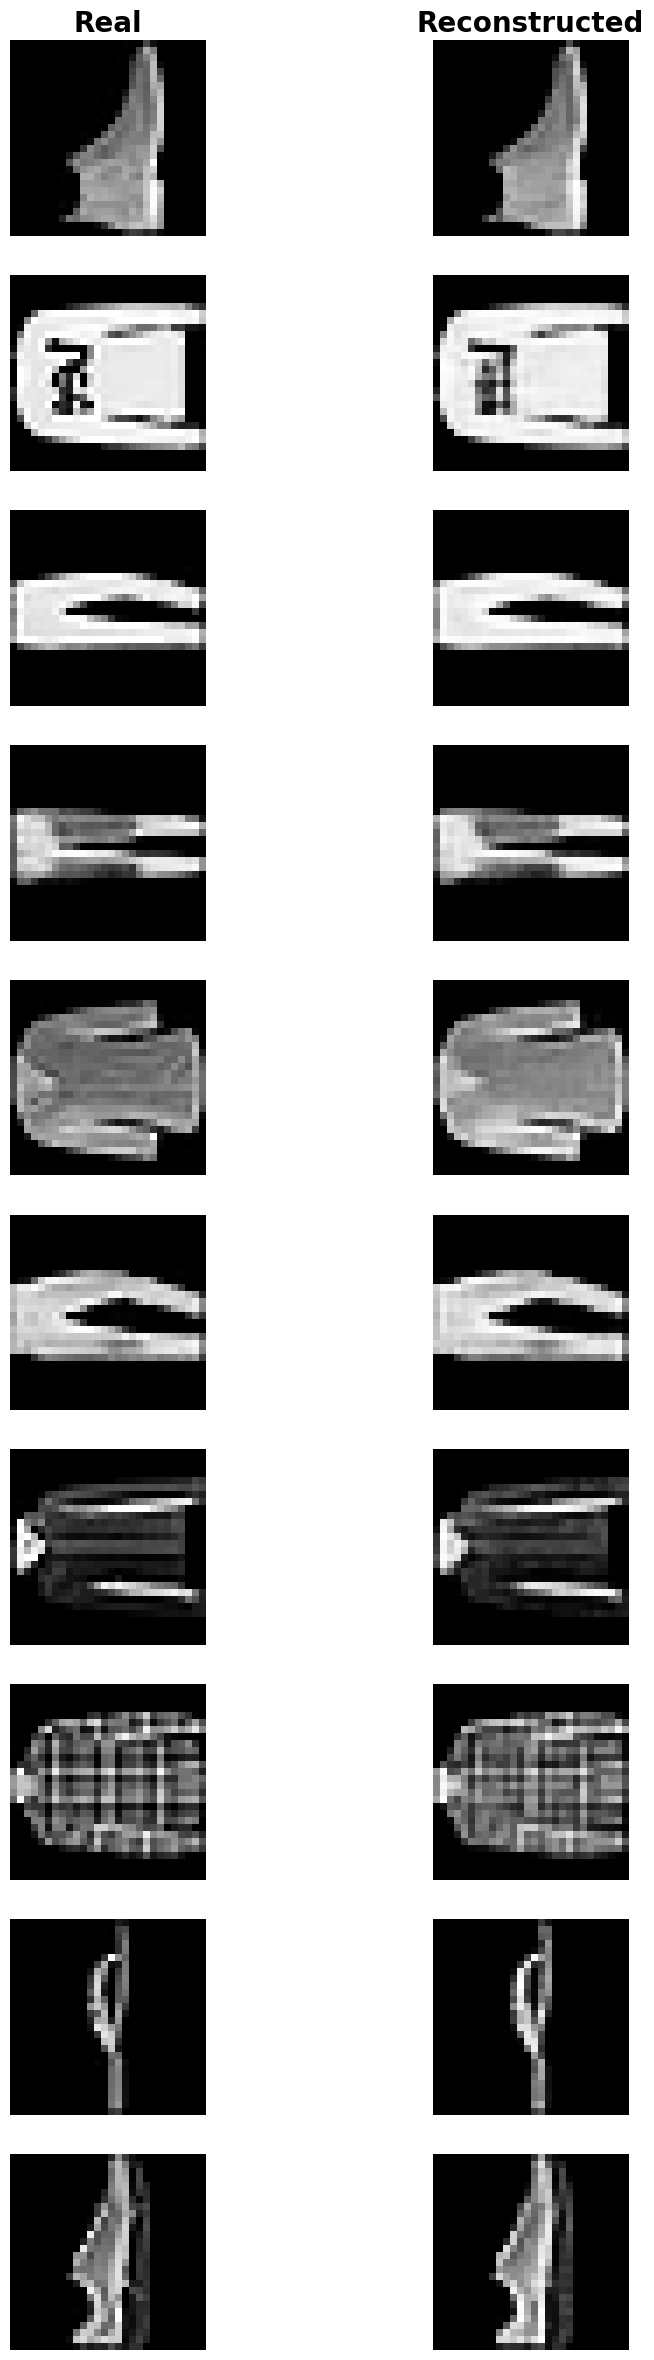

In [18]:
# show some images with their reconstructions

sample = x_test[:10]
decoded_imgs = auto_conv.predict(sample)

plot_before_after(sample, decoded_imgs[...,0], n_before='Real', n_after='Reconstructed')



## 2.b - Denoising autoencoder  

Otro uso bastante utilizado de los autoencoders, es la eliminación de ruido en las imágenes, esta tarea es de gran utilidad en campos como la medicina y astronomía.

A continuación podemos ver 3 resultados de denoising utilizando deep autoencoders.

<center>
    
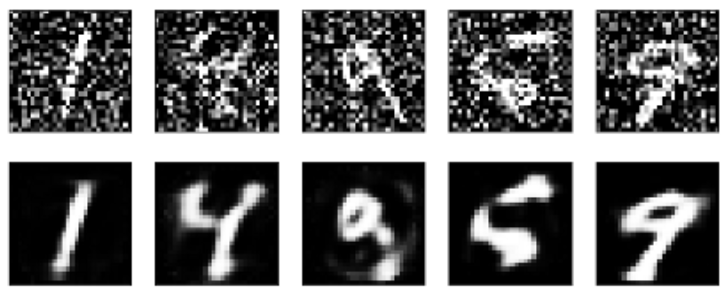
    
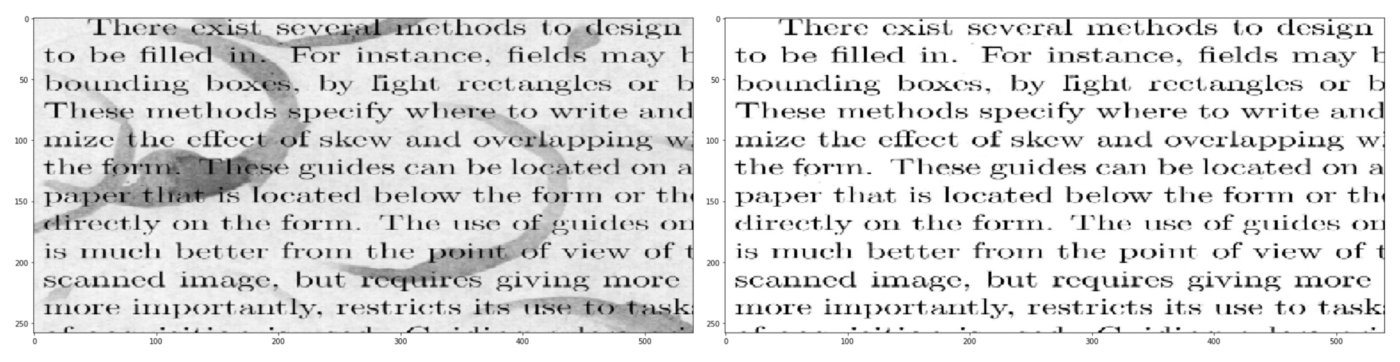

<img src="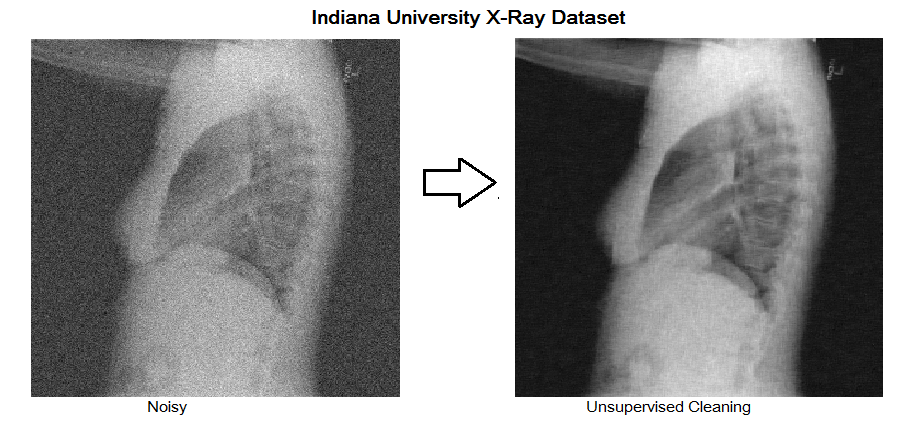 ">
<center>

Para entrenar un denoising autoencoder, la idea es similar a los modelos recién explorados, la diferencia es que en lugar de utilizar  las imágenes entregadas como datos de entrada y target, estás son utilizadas como target solamente, mientras que los datos de entrada serán imágenes pre-procesadas a las que se agrega ruido de forma artificial.

Cree una versión ruidosa del conjunto de datos Fashion MNIST agregandole ruido aleatorio a cada imagen. Puede utilizar las librerías random de numpy o tensorflow (o cualquier herramienta que encuentre útil). Además puede cargar el dataset nuevamente si lo modificó anteriormente.

Luego cree y entrene un autoencoder convolucional utilizando las imágenes ruidosas como entrada y la imagen original como objetivo.



In [19]:
#add noise to the images

std = .15

x_train_noisy = x_train  + tf.random.normal(shape=x_train.shape, mean=0.0, stddev=std)
x_test_noisy = x_test  + tf.random.normal(shape=x_test.shape, mean=0.0, stddev=std)


(10, 28, 28)


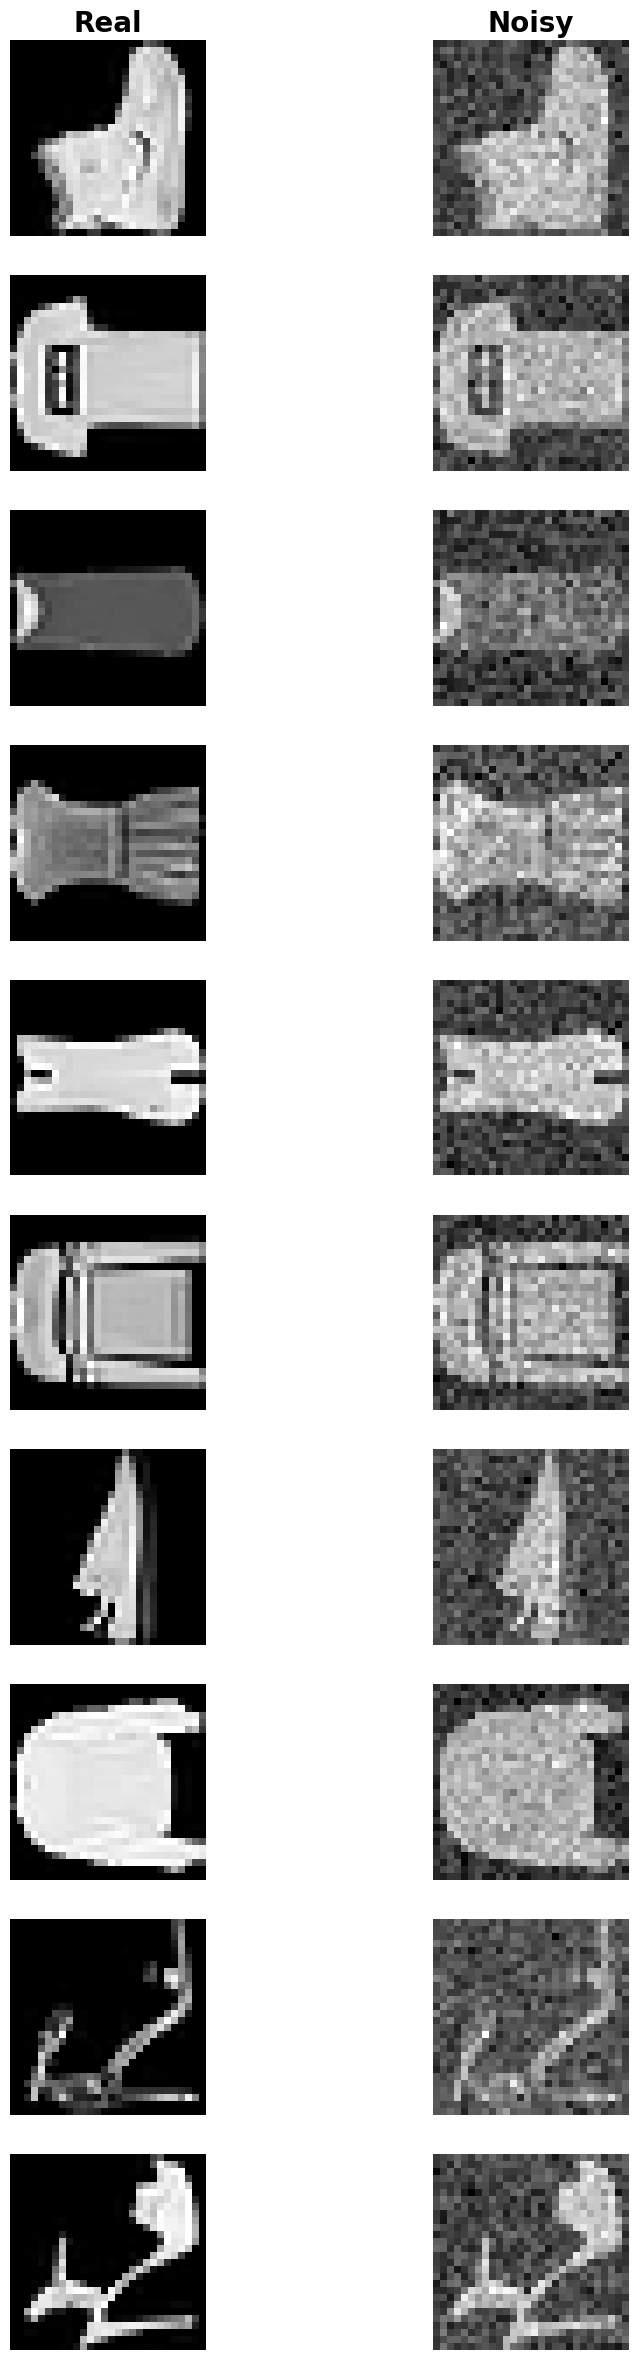

In [20]:
# show some images with their noisy versions

sample = x_train_noisy[:10]
noisy_sample = x_train[:10]
print(sample.shape)
plot_before_after(noisy_sample, sample, n_before='Real', n_after='Noisy')


Ahora defina y entrene el denoising autoencoder con alguna estructura apropiada. 

Usaremos nuevamente el autoencoder convolucional, dado que este aparenta ser el que tuvo mejor desempeño

In [23]:


denoising_autoencoder = convolutional_autoencoder()

denoising_autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       3692

In [25]:
history = denoising_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=10,
                                    shuffle=True,
                                    validation_data=(x_test_noisy, x_test))
                            
                            

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2729 - val_loss: 0.2626
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2591 - val_loss: 0.2604
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2575 - val_loss: 0.2590
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2567 - val_loss: 0.2583
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2562 - val_loss: 0.2579
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2558 - val_loss: 0.2579
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2555 - val_loss: 0.2576
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2553 - val_loss: 0.2574
Epoch 9/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2551 - val_loss: 0.2571
Epoch 10/10
1875/1875 [==============================] - 78s 41m

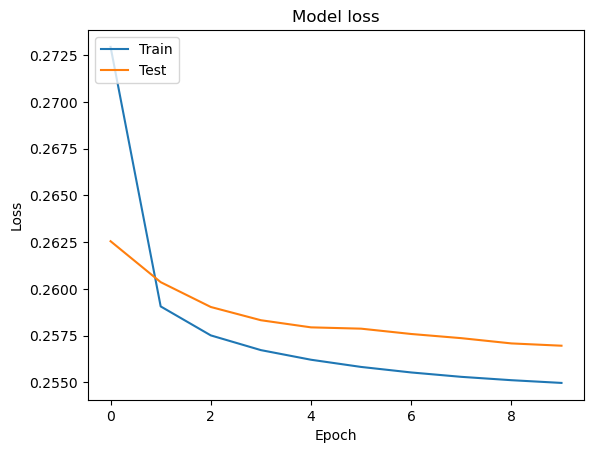

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 20ms/step


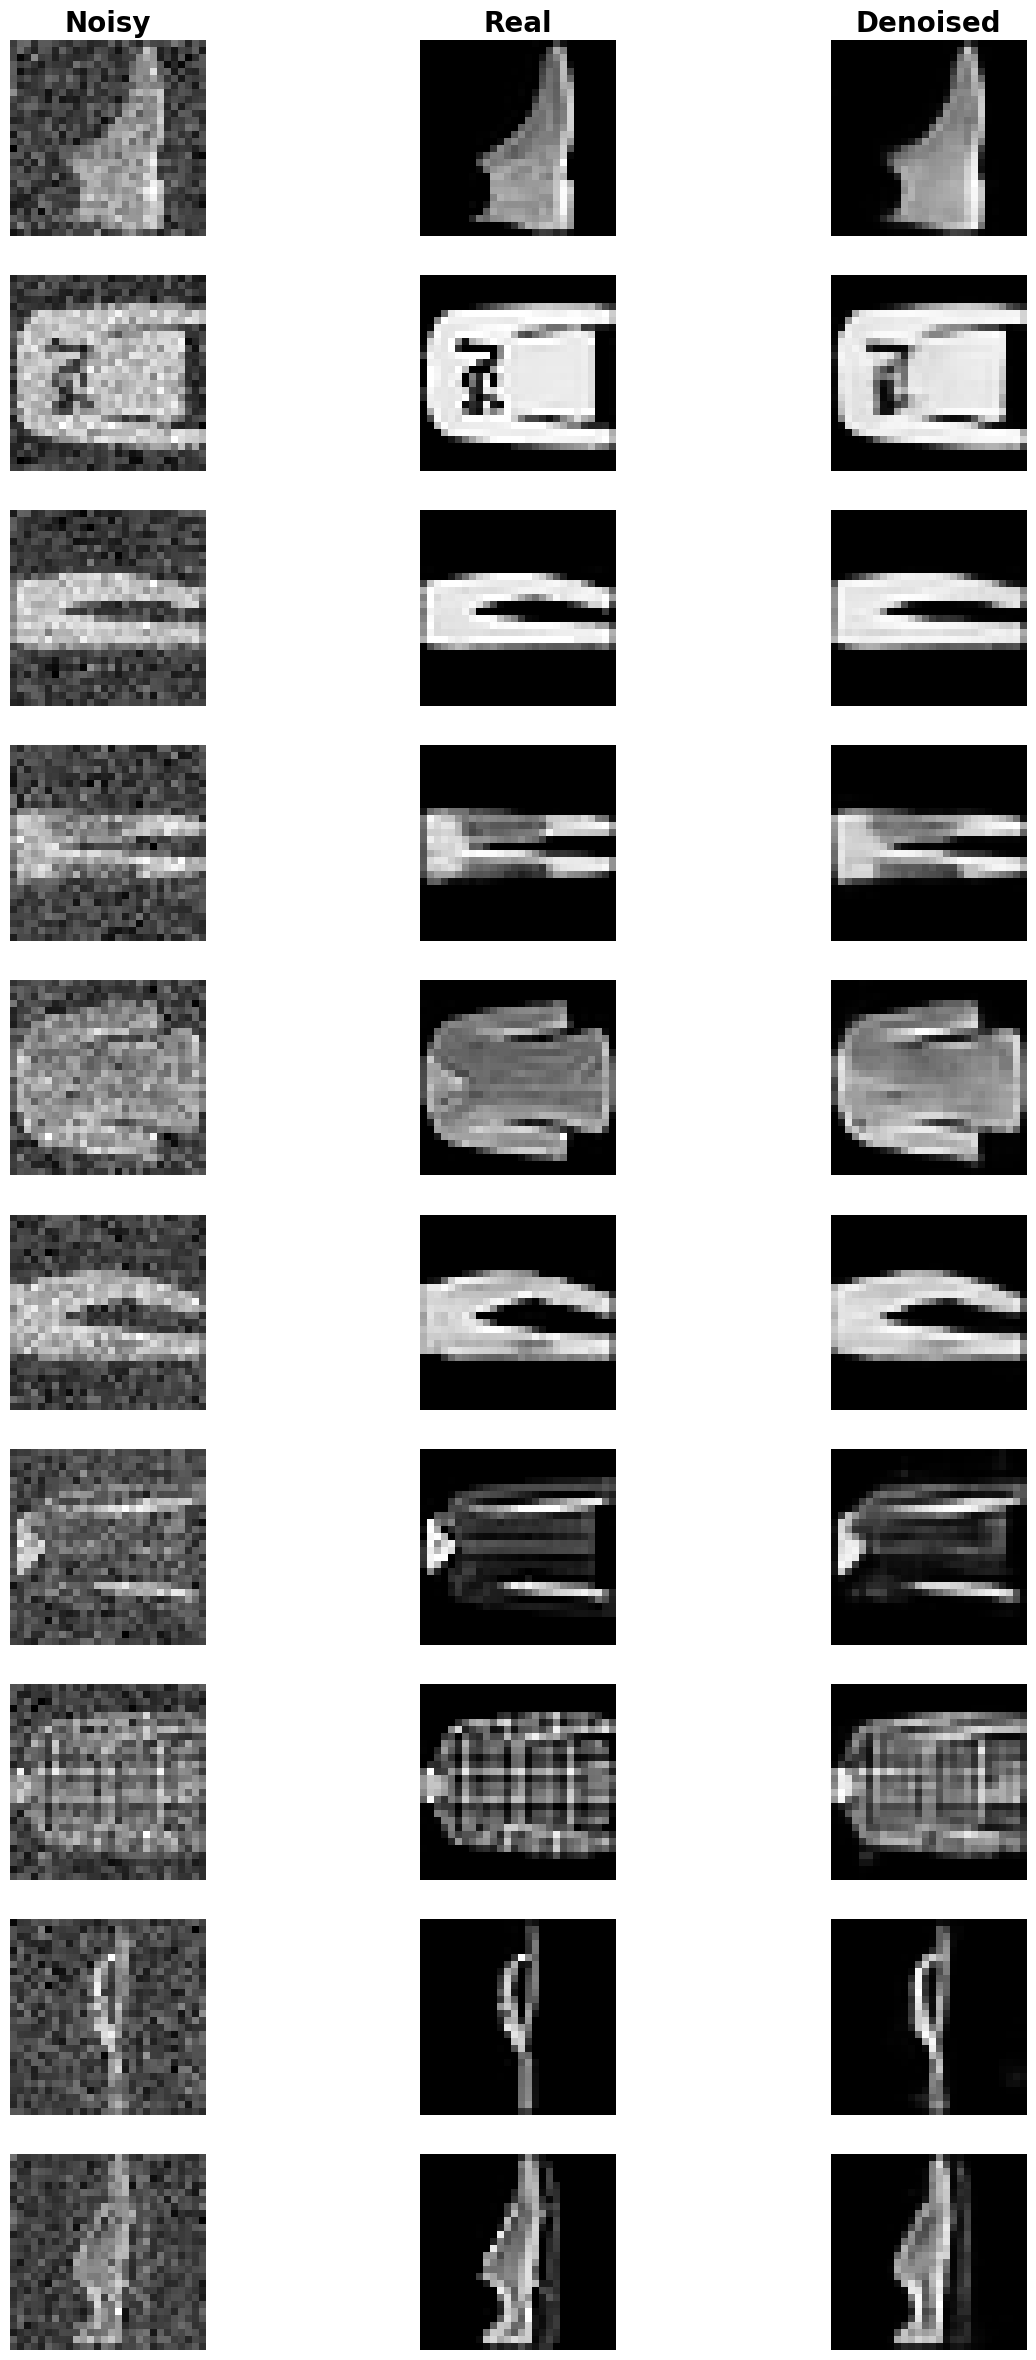

In [28]:
# show some images with their noisy version and their denoised version

sample = x_test[:10]
noisy_sample = x_test_noisy[:10]
decoded_imgs = denoising_autoencoder.predict(noisy_sample)

fig = plt.figure(figsize=(15, 30))

for i in range(3):
    for j in range(10):
        
        fig.add_subplot(10, 3, i + j * 3 + 1)
        plt.imshow(array_to_image([noisy_sample, sample, decoded_imgs[...,0]][i][j]))
        plt.axis("off")
        
        if j == 0:
            plt.title(["Noisy", "Real", "Denoised"][i], fontsize=20, weight='bold')


## 2.c Detección de anomalías

Otra utilidad de los autoencoder recae en la detección de anomalías. En este caso se entrenará un autoencoder para detectar anomalías en ECG (Electrocardiogramas). 

Se utilizará una versión simplificada de [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000), la cuál contiene 140 electrocardiogramas en dónde cada uno de estos cuenta con 140 puntos y se consideran las etiquetas `0` si es un ECG anómalo y `1` si es normal.

Nota: este es un conjunto de datos etiquetado, por lo que podría expresarlo como un problema de aprendizaje supervisado. El objetivo de este ejemplo es ilustrar los conceptos de detección de anomalías que puede aplicar a conjuntos de datos más grandes, donde no tiene etiquetas disponibles (por ejemplo, si tiene muchos miles de ritmos normales y solo una pequeña cantidad de ritmos anormales).

¿Cómo se detecta anomalías utilizando un autoencoder? 
Recuerde que un codificador automático está entrenado para minimizar el error de reconstrucción, por lo que se entrenará un autoencoder solo en los ritmos normales, luego lo usará para reconstruir todos los datos. 
Es por esto que los ritmos anormales tendrán un mayor error de reconstrucción, por lo que se clasificará un ritmo como anómalo si el error de reconstrucción supera un umbral fijo.

Para detectar anomalías utilizando un autoencoder, primero se entrenará el autoencoder solo con los datos normales del conjunto de datos. Luego, se utilizará el autoencoder entrenado para reconstruir todos los datos del conjunto de datos. Los datos anómalos tendrán un mayor error de reconstrucción que los ECG normales, por lo que se clasificará un ECG como anómalo si su error de reconstrucción supera un umbral predeterminado. Esto se puede hacer calculando el error de reconstrucción para cada dato utilizando una medida de error común. Una vez que se haya calculado el error de reconstrucción para cada dato, se puede elegir un umbral y clasificarlos como anómalos o normales en función de si su error de reconstrucción supera o no el umbral.

### Carga de datos

In [29]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [31]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

Normalice la data en `[0,1]`, luego separe la data normal de la anormal de acuerdo a su etiqueta.

In [33]:
# split the data into normal and anomalous, then standarize each entry

def zero_one_per_row(x):
    return (x - x.min(axis=1, keepdims=True)) / (x.max(axis=1, keepdims=True) - x.min(axis=1, keepdims=True))

normal_train_data = zero_one_per_row(train_data[train_labels == 0])
anomalous_train_data = zero_one_per_row(train_data[train_labels == 1])

normal_test_data = zero_one_per_row(test_data[test_labels == 0])
anomalous_test_data = zero_one_per_row(test_data[test_labels == 1])




Grafique un ECG normal y uno anormal.

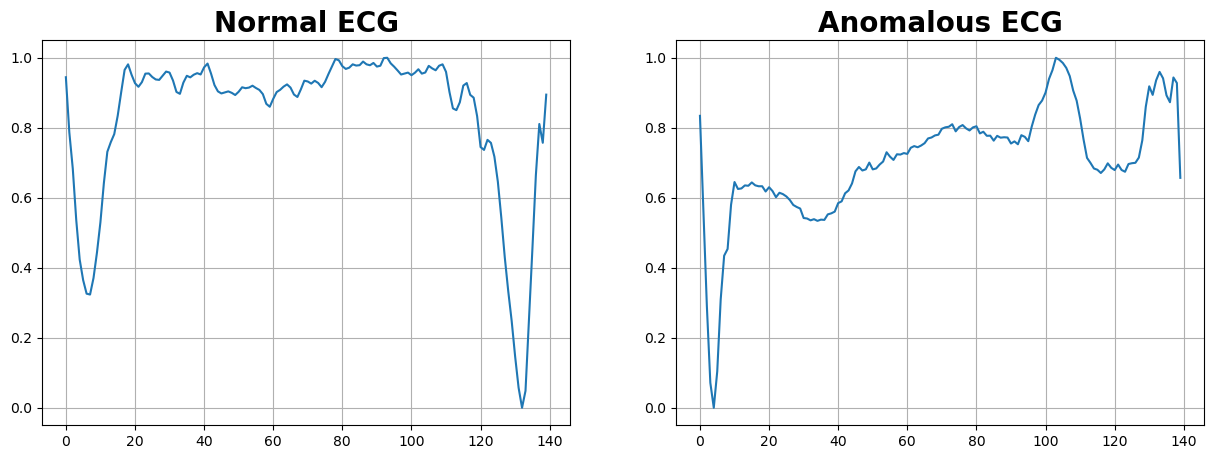

In [36]:
normal = normal_train_data[0]
anomalous = anomalous_train_data[0]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(normal)
plt.title("Normal ECG", fontsize=20, weight='bold')
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(anomalous)
plt.title("Anomalous ECG", fontsize=20, weight='bold')
plt.show()

#...

#### Modelo

Defina, compile y entrene un autoencoder denso para la detección de anomalías, puede ser uno ya creado anteriormente o uno nuevo.

Recuerde que el autoencoder debe ser entrenado usando solo los ECGs normales, pero debe ser validado en todo el test set.

Luego grafique la loss de entrenamiento y de validación en un mismo gráfico.

In [56]:
normal_train_data[0]

array([0.94442407, 0.78702978, 0.68334069, 0.53674484, 0.42354166,
       0.36480658, 0.32602485, 0.32352519, 0.37081566, 0.44359303,
       0.5303686 , 0.64219101, 0.73145641, 0.75894318, 0.78192111,
       0.83444735, 0.90116793, 0.96540182, 0.98125762, 0.95188237,
       0.92746619, 0.91704855, 0.93040946, 0.9546613 , 0.955246  ,
       0.945054  , 0.93807982, 0.93676974, 0.94873584, 0.96060156,
       0.95776015, 0.9351086 , 0.90236538, 0.89695674, 0.92898649,
       0.94848519, 0.94406407, 0.95161065, 0.95603767, 0.95229702,
       0.9726713 , 0.98343563, 0.95504063, 0.92203406, 0.90397902,
       0.89810015, 0.90100495, 0.9039617 , 0.89980321, 0.89359603,
       0.90294935, 0.91568717, 0.91310508, 0.91484656, 0.92023341,
       0.91362021, 0.90812854, 0.89616781, 0.86839297, 0.8600014 ,
       0.88262547, 0.90205619, 0.90840326, 0.9175657 , 0.92395228,
       0.91484171, 0.8950124 , 0.88794375, 0.90977368, 0.93457712,
       0.93224069, 0.92621034, 0.93436107, 0.9280957 , 0.91598

In [61]:
class Autoencoder(tf.keras.Model):
    
    def __init__(self):
        
        super(Autoencoder, self).__init__()
        
        
        self.encoder = tf.keras.Sequential([layers.Dense(64, activation='relu'), layers.Dense(16, activation='relu')])
        
        self.decoder = tf.keras.Sequential([layers.Dense(64, activation='relu'), layers.Dense(140, activation='sigmoid')])

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

autoencoder = Autoencoder()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#train the model

history = autoencoder.fit(normal_train_data, normal_train_data, epochs=10, shuffle=True, validation_data=(normal_test_data, normal_test_data))


Epoch 1/10
53/53 [==============================] - 1s 3ms/step - loss: 0.5409 - val_loss: 0.4597
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.4543 - val_loss: 0.4480
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4468 - val_loss: 0.4402
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4393 - val_loss: 0.4344
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4348 - val_loss: 0.4316
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 0.4323 - val_loss: 0.4294
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4305 - val_loss: 0.4290
Epoch 8/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4290 - val_loss: 0.4264
Epoch 9/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4274 - val_loss: 0.4254
Epoch 10/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4255 - val_loss: 0.4231


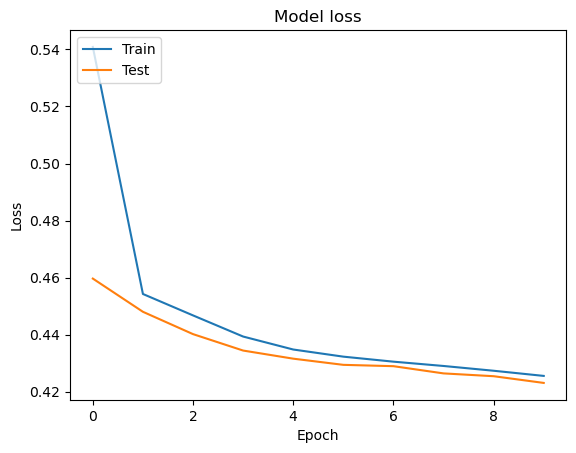

In [62]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Se clasificará un ECG como anómalo si el error de reconstrucción es mayor que una desviación estándar de los ejemplos de entrenamiento normales. 

Primero, trazaremos un ECG normal del conjunto de entrenamiento, la reconstrucción después de que el autoencoder lo codifique y decodifique, y el error de reconstrucción.

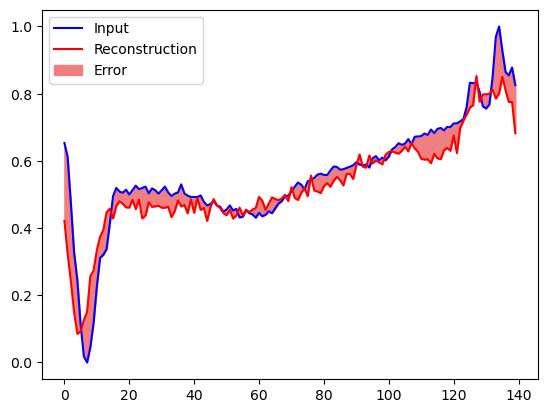

In [63]:
#run
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Ahora cree un gráfico similar  pero para un ejemplo anómalo del test

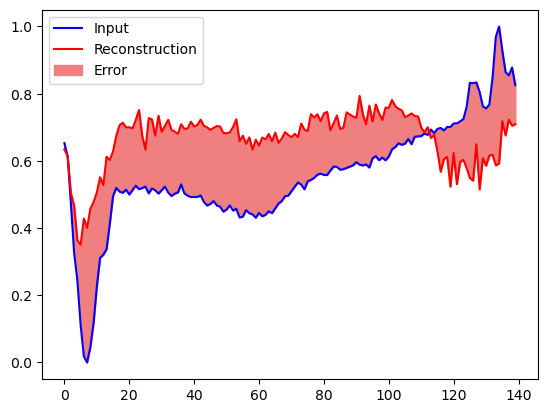

In [64]:
#run
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detectar anomalías

Ahora detectará anomalías calculando si la loss de reconstrucción es mayor que un umbral fijo. 

En este caso deberá calcular el error promedio para ejemplos normales del conjunto de entrenamiento, luego clasificar ejemplos futuros como anómalos si el error de reconstrucción es mayor que una desviación estándar del conjunto de entrenamiento.

A continuación grafique el error de reconstrucción en un ECG normal del set de entrenamiento

53/53 [==============================] - 0s 789us/step


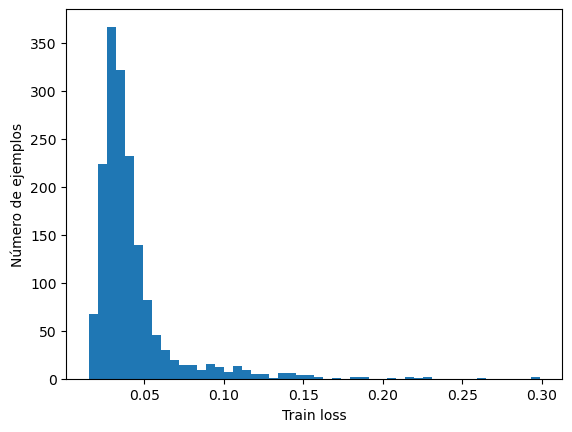

In [65]:
#run 
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)


plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("Número de ejemplos")
plt.show()

Defina el valor del umbral como una desviacion estandar arriba de la media de la train_loss, puede utilizar `np.mean` y `np.std`

Nota: Este es solo un ejemplo de elección de umbral, existen otras estrategias para elegirlo, la elección del enfoque dependerá del dataset.

In [69]:
umbral= np.mean(train_loss) + np.std(train_loss) 


Examine el error de reconstrucción de los ejemplos anómalos del test set. Para esto visualice un gráfico similar al del error de reconstrucción en un ECG normal del set de entrenamiento, pero esta vez con los ejemplos anómalos del set de testeo.

¿Qué puede concluir sobre el error de reconstrucción de la mayoría del test set y el umbral?

19/19 [==============================] - 0s 834us/step


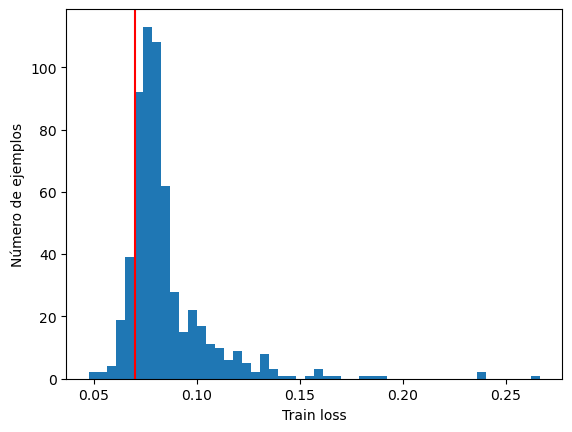

In [70]:
#...
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)



plt.hist(test_loss[None,:], bins=50)
plt.axvline(umbral, c='r')
plt.xlabel("Train loss")
plt.ylabel("Número de ejemplos")
plt.show()

Defina la función predict para clasificar un ECG como anómalo si el error de reconstrucción es mayor que el umbral, puede utilizar `tf.math.less` para retornar un Tensor de booleanos. 

Luego utilice esta función para predecir y muestre el accuracy, la presición y el recall del detector.

In [91]:
len(predicciones)

409

In [82]:
tf.keras.losses.mae(autoencoder.predict(test_data), test_data).shape

32/32 [==============================] - 0s 747us/step


TensorShape([1000])

In [97]:
from keras.metrics import Precision, Recall, Accuracy

def predict(autoencoder, data, umbral):
    
    reconstructions = autoencoder.predict(data)
    loss = tf.keras.losses.mae(reconstructions, data)

    print(data.shape)

    return [0 if i else 1 for i in tf.math.less(loss, umbral)]

predicciones = predict(autoencoder, test_data, umbral)

# get accuracy, precision, and recall

def get_metrics(true_labels, predicted_labels):
    
    accuracy = tf.keras.metrics.Accuracy()
    accuracy.update_state(true_labels, predicted_labels)

    precision = tf.keras.metrics.Precision()
    precision.update_state(true_labels, predicted_labels)

    recall = tf.keras.metrics.Recall()
    recall.update_state(true_labels, predicted_labels)
         
        
    return accuracy, precision, recall

accuracy, precision, recall = get_metrics(test_labels, predicciones)

print(f'accuracy: {accuracy.result().numpy()}, precision: {precision.result().numpy()}, recall: {recall.result().numpy()}')

32/32 [==============================] - 0s 792us/step
(1000, 140)
accuracy: 0.5910000205039978, precision: 0.5910000205039978, recall: 1.0


Si quisieran explorar un poco más el problema, en [anomagram](https://anomagram.fastforwardlabs.com/#/) pueden ver una herramienta de visualización interactiva para explorar cómo se puede aplicar un autoencoder a la tarea de detección de anomalías, pueden dibujar su propio ECG y se predice en tiempo real si es normal o anormal, además pueden explorar como la elección del umbral impacta en la precisión y recall.